In [1]:
import matplotlib.pyplot as plt

from astropy.wcs import WCS
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
from astropy.nddata import Cutout2D
import os

def find_cutout(filename_345s, filename_33s, size_345s, x_345s, y_345s):
    cutout_345 = []
    cutout_33 = []
    for filename_345, filename_33, size_345, x_345, y_345 in zip(filename_345s, filename_33s, size_345s, x_345s, y_345s):
        hdu_345 = fits.open(filename_345)[0]
        wcs_345 = WCS(hdu_345.header, relax=True, naxis=2)
        hdu_33 = fits.open(filename_33)[0]
        wcs_33 = WCS(hdu_33.header, relax=True, naxis=2)

        #converting the position information between different datasets
        sky = wcs_345.pixel_to_world(x_345, y_345)    #position
        x_33, y_33 = wcs_33.world_to_pixel(sky)

        margin_345 = wcs_345.pixel_to_world(x_345 - size_345/2, y_345 - size_345/2)    #size
        x_33_margin, y_33_margin = wcs_33.world_to_pixel(margin_345)
        size_33 = 2 * (x_33 - x_33_margin)

        #doing the cutout
        cutout_345.append(Cutout2D(hdu_345.data[0][0], (x_345, y_345), size_345, wcs=wcs_345, copy=True))
        cutout_33.append(Cutout2D(hdu_33.data[0][0], (x_33, y_33), size_33, wcs=wcs_33, copy=True))
        
    return cutout_345, cutout_33

def gen_axis(cutout_345s):
    axs = []
#     subplot_nums = [241, 242, 243, 244, 245, 246, 247]
    subplot_nums = [111]
    for subplot_num, cutout_345 in zip(subplot_nums[:len(cutout_345s)], cutout_345s):
        axs.append(plt.subplot(subplot_num, projection=cutout_345.wcs))
    return axs
def gen_axises(cutout_345s):
    axs = []
    subplot_nums = [241, 242, 243, 244, 245, 246, 247]

    for subplot_num, cutout_345 in zip(subplot_nums[:len(cutout_345s)], cutout_345s):
        axs.append(plt.subplot(subplot_num, projection=cutout_345.wcs))
    return axs

def plot_contour(axs,cutout_345s, cutout_33s, levs, vmins, vmaxs):
    
    for ax, cutout_345, cutout_33, level, vmi, vma in zip(axs, cutout_345s, cutout_33s, levs, vmins, vmaxs):
        ax.set_xlabel('Right Ascension')
        ax.set_ylabel('Declination')
        #filename
#         ax.imshow(cutout_345.data, vmin=-5e-5, vmax=5e-3, origin='lower')
        ax.imshow(cutout_345.data, vmin=vmi, vmax=vma, origin='lower')
        ax.contour(cutout_33.data, transform=ax.get_transform(cutout_33.wcs), \
               levels=[9.07e-6 * 3,9.07e-6 * 6,9.07e-6 * 9 ], colors=['c','yellow','white'])
        ax.set_xlim(0,221)


def plot_disk(axs, cutout_345s, vmins, vmaxs):
    ax.set_xlabel('Right Ascension')
    ax.set_ylabel('Declination')
    ax.imshow(cutout_345.data, vmin=vmi, vmax=vma)

indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in param

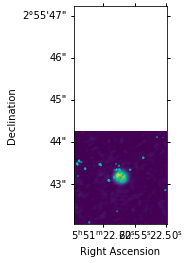

In [2]:
# %matplotlib notebook

# filename_345 = ['data/HH270MMS2_345GHz.fits', 'data/HOPS-56_345GHz.fits', 'data/HOPS-65_345GHz.fits',\
#                'data/HOPS-124_345GHz.fits', 'data/HOPS-140_345GHz.fits', 'data/HOPS-157_345GHz.fits',\
#                'data/HOPS-163_345GHz.fits'] 
# filename_33 = ['data/HH270MMS2_44GHz_robust2.0.fits', 'data/HOPS-56_33GHz_robust2.0.fits', 'data/HOPS-65_15GHz_robust2.0.fits',\
#               'data/HOPS-124_44GHz_robust2.0.fits', 'data/HOPS-140_33GHz_robust2.0.fits', 'data/HOPS-157_33GHz_robust2.0.fits',\
#               'data/HOPS-163_33GHz_robust2.0.fits']
# size_345 = [221, 221, 221, 221, 271, 221, 221]
# x_345 = [490, 1566, 478, 621, 1517, 498, 514] 
# y_345 = [549, 938, 496, 505, 1487, 479, 511] 
# rms_33 = [9.07e-6, 5.3e-6, 2.4e-6, 1.47e-5, 4.96e-6, 5.15e-6, 5.11e-6]
filename_345 = ['data/HH270MMS2_345GHz.fits']
filename_33 = ['data/HH270MMS2_44GHz_robust2.0.fits']
size_345 = [221]
x_345 = [490]
y_345 = [549]
v_min = [-5e-6]
v_max= [15e-3]
rms_33 = [9.07e-6]
level = [[rms_33 * 3,rms_33 * 6,rms_33 * 9 ]]
cutout_345, cutout_33 = find_cutout(filename_345s = filename_345, filename_33s = filename_33, size_345s=size_345, x_345s=x_345, y_345s=y_345)
axs = gen_axis(cutout_345)
plot_contour(axs,cutout_345, cutout_33, levs=level, vmins = v_min, vmaxs = v_max)

In [68]:
# plt.imshow(cutout_345[0].data)
cutout_345[0].data.size

48841

In [69]:
cutout_33[0].data.size

268324

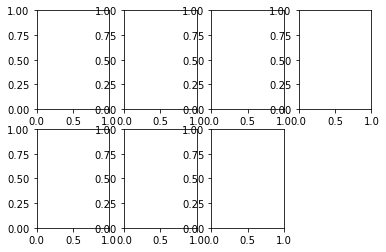

In [7]:
import matplotlib.pyplot as plt
# def gen_axis(cutout_345s):
axs = []
subplot_nums = [241, 242, 243, 244, 245, 246, 247]
for subplot_num in subplot_nums:
    axs.append(plt.subplot(subplot_num))